In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing

In [30]:
df=pd.read_csv('Crop Production data.csv')

In [31]:
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [33]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [34]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crop_Year,246091.0,2005.643018,4.952164e+00,1997.00,2002.0,2006.0,2010.0,2.015000e+03
Area,246091.0,12002.820864,5.052340e+04,0.04,80.0,582.0,4392.0,8.580100e+06
Production,242361.0,582503.442251,1.706581e+07,0.00,88.0,729.0,7023.0,1.250800e+09


In [35]:
print(df['Production'].isnull().sum())
print(df['Production'].count())

3730
242361


In [36]:
states=df['State_Name'].unique()
print(states)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [37]:
print(len(states))

33


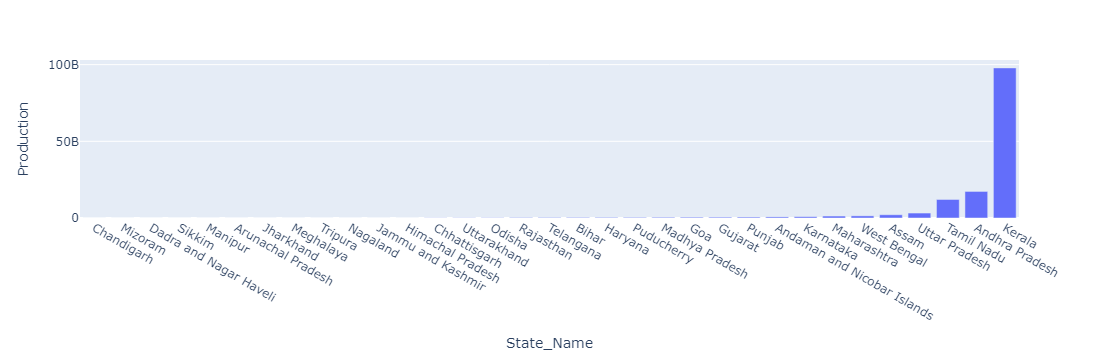

In [38]:
overall=df.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production')
px.bar(overall,'State_Name','Production')

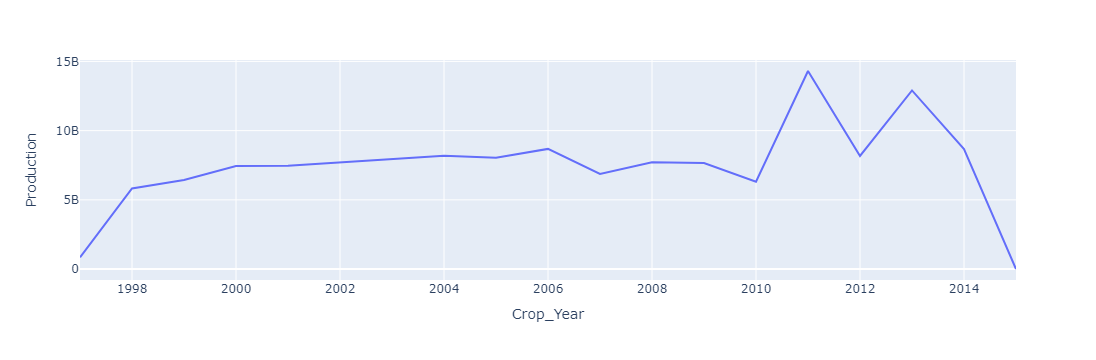

In [39]:
overall_year=df.groupby(by='Crop_Year')['Production'].sum().reset_index()
px.line(overall_year,'Crop_Year','Production')

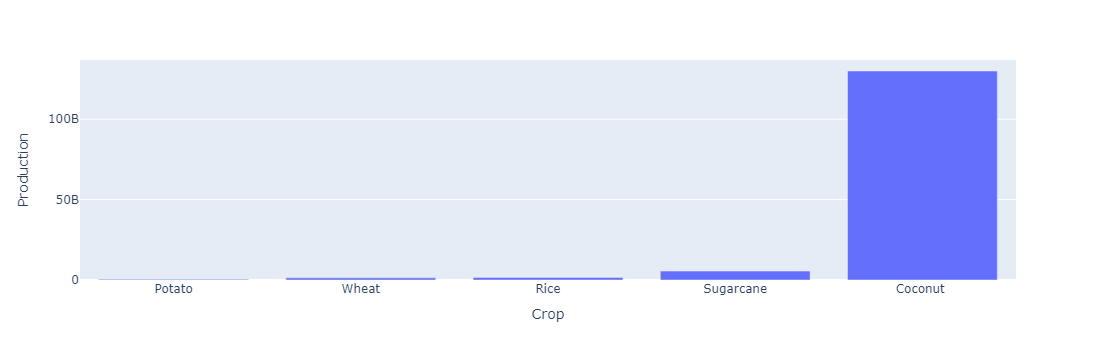

In [40]:
temp=df.groupby(by='Crop').sum().reset_index().sort_values(by='Production')
px.bar(temp.tail(),'Crop','Production')

In [41]:
df['Season'].unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['season_numerical']=le.fit_transform(df['Season'])

In [43]:
df.head(4)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,season_numerical
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,1
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,1
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4


In [44]:
X=pd.DataFrame()
X=df.iloc[:,5:8]
print(X)

            Area  Production  season_numerical
0         1254.0      2000.0                 1
1            2.0         1.0                 1
2          102.0       321.0                 1
3          176.0       641.0                 4
4          720.0       165.0                 4
...          ...         ...               ...
246086     306.0       801.0                 3
246087     627.0       463.0                 3
246088     324.0     16250.0                 4
246089  279151.0    597899.0                 5
246090     175.0        88.0                 5

[246091 rows x 3 columns]


In [45]:
train_df=X[X['Production'].notnull()]
impute_df=X[X['Production'].isnull()]

In [46]:
X_train=train_df[['Area','season_numerical']]
y_train=train_df[['Production']].values.ravel()

In [47]:
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [48]:
imputed_values=rf_model.predict(impute_df[['Area','season_numerical']])

In [49]:
predicted_production=pd.DataFrame()
predicted_production=df.loc[impute_df.index,'Production']=imputed_values

In [50]:
from sklearn.metrics import mean_squared_error

y_pred = rf_model.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 49803112188809.03
RMSE: 7057132.01
